In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sn

In [2]:
#Extracting Data
EmpAbs_data = pd.read_excel("Absenteeism_at_work_Project.xls")
print("Data read Successfully")

Data read Successfully


In [3]:
EmpAbs_data = EmpAbs_data.reset_index(drop=True)
EmpAbs_data.index += 1
Data = EmpAbs_data

In [4]:
#Converting variables to categoric and numeric
a= list(range(1, 5, 1))
b= list(range(11, 17, 1))
c=list(set().union(a,b))
for i in c:
    Data.iloc[:, i] = Data.iloc[:, i].astype('category')


Data.iloc[:, 0] = Data.iloc[:, 0].astype(object)
Data.iloc[:, 13] = Data.iloc[:, 13].astype('float64')
Data.iloc[:, 16] = Data.iloc[:, 16].astype('float64')

In [86]:
Data.iloc[:5,9:21]

,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Absenteeism_time_in_hours
1,0.244925,0.769231,0.0,1.0,0.50,1.0,0.0,0.5,0.653846,0.700000,4.0
2,0.244925,0.769231,1.0,1.0,0.25,1.0,0.0,0.0,0.807692,0.512859,0.0
3,0.244925,0.769231,0.0,1.0,0.00,1.0,0.0,0.0,0.634615,0.500000,2.0
4,0.244925,0.769231,0.0,1.0,0.50,1.0,1.0,0.0,0.230769,0.300000,4.0
5,0.244925,0.769231,0.0,1.0,0.50,1.0,0.0,0.5,0.653846,0.700000,2.0


# Missing Values Analysis

In [5]:
#Missing value analysis
missing_val = pd.DataFrame(Data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = { 'index': 'Variables', 0: 'Missing_Values_Count'})
missing_val = missing_val.sort_values('Missing_Values_Count', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Values_Count
0,Body_mass_index,31
1,Absenteeism_time_in_hours,22
2,Height,14
3,Work_load_Average_day,10
4,Education,10
5,Transportation_expense,7
6,Son,6
7,Disciplinary_failure,6
8,Hit_target,6
9,Social_smoker,4


In [ ]:
Data1 = Data[Data.isnull().any(axis=1)]
Data1

In [6]:
#Creating a new Dataframe by data types
Data_num=Data.select_dtypes(['float64'])
Data_cat=Data.select_dtypes(['category'])
Data_num = Data_num.reset_index(drop=True)
Data_num.index += 1
Data_cat = Data_cat.reset_index(drop=True)
Data_cat.index += 1

In [164]:
Data_num.head(5)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
1,289.0,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0,4.0
2,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,0.0,98.0,178.0,31.0,0.0
3,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.0,2.0
4,279.0,5.0,14.0,39.0,239554.0,97.0,2.0,0.0,68.0,168.0,24.0,4.0
5,289.0,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0,2.0


In [165]:
Data_cat.head(5)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker
1,26.0,7.0,3,1,0.0,1.0,1.0,0.0
2,0.0,7.0,3,1,1.0,1.0,1.0,0.0
3,23.0,7.0,4,1,0.0,1.0,1.0,0.0
4,7.0,7.0,5,1,0.0,1.0,1.0,1.0
5,23.0,7.0,5,1,0.0,1.0,1.0,0.0


# Feature Selection

In [113]:
#Feature Selection using Correlation, VIF, and Chi-Square test

## 1) Correlation
import seaborn as sns
correlations = Data_num.corr()
correlations
#sns.heatmap(correlations, mask = np.zeros_like(correlations, dtype= np.bool), cmap=sns.diverging_palette(200, 12, as_cmap= True),
#            square = True, ax =ax)
correlations.style.background_gradient()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average_day,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1,0.257917,-0.349927,0.00133231,-0.0808867,-0.209945,-0.195982,-0.135928,0.0472163
Distance_from_Residence_to_Work,0.257917,1,0.128497,-0.0786912,-0.0141823,-0.0466121,-0.357828,0.117728,-0.102967
Service_time,-0.349927,0.128497,1,0.0134231,-0.00488155,0.454772,-0.0578259,0.502634,0.0165598
Work_load_Average_day,0.00133231,-0.0786912,0.0134231,1,-0.0871998,-0.0303855,0.109154,-0.0748954,0.0279859
Hit_target,-0.0808867,-0.0141823,-0.00488155,-0.0871998,1,-0.0448165,0.0887133,-0.0696561,0.0223112
Weight,-0.209945,-0.0466121,0.454772,-0.0303855,-0.0448165,1,0.307546,0.90406,-0.00927527
Height,-0.195982,-0.357828,-0.0578259,0.109154,0.0887133,0.307546,1,-0.127717,0.0947721
Body_mass_index,-0.135928,0.117728,0.502634,-0.0748954,-0.0696561,0.90406,-0.127717,1,-0.0590835
Absenteeism_time_in_hours,0.0472163,-0.102967,0.0165598,0.0279859,0.0223112,-0.00927527,0.0947721,-0.0590835,1


In [151]:
## 2) Chi-square test

from scipy.stats import chi2_contingency
factors_paired_bin = [(i,j) for i in Data_cat.columns.values for j in Data_cat.columns.values] 

chi2_bin, p_values_bin =[], []

for f in factors_paired_bin:
    if f[0] != f[1]:
             chitest_bin = chi2_contingency(pd.crosstab(Data_cat[f[0]], Data_cat[f[1]]))   
             chi2_bin.append(chitest_bin[0])
             p_values_bin.append(chitest_bin[1])
            
    else:      
             chi2_bin.append(0)
             p_values_bin.append(0)

chi2_bin = np.array(chi2_bin).reshape((8,8))
chi2_df_bin = pd.DataFrame(chi2_bin, index=Data_cat.columns.values, columns=Data_cat.columns.values)
p_values_bin = np.array(p_values_bin).reshape((8,8)) # shaping it as a matrix
p_values_bin = pd.DataFrame(p_values_bin, index=Data_cat.columns.values, columns=Data_cat.columns.values)
p_values_bin

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker
Reason_for_absence,0.000000e+00,4.925170e-19,0.058063,2.838194e-22,4.324537e-125,8.983660e-11,2.292921e-08,3.541072e-09
Month_of_absence,4.925170e-19,0.000000e+00,0.554457,0.000000e+00,2.042695e-04,1.326699e-02,9.479499e-03,2.333154e-02
Day_of_the_week,5.806286e-02,5.544573e-01,0.000000,1.953925e-01,2.976322e-01,5.928306e-01,6.325213e-01,8.073502e-01
Seasons,2.838194e-22,0.000000e+00,0.195393,0.000000e+00,7.817284e-05,9.018080e-02,1.291514e-01,7.879567e-02
Disciplinary_failure,4.324537e-125,2.042695e-04,0.297632,7.817284e-05,0.000000e+00,3.648447e-01,2.644425e-01,3.706029e-03
Education,8.983660e-11,1.326699e-02,0.592831,9.018080e-02,3.648447e-01,0.000000e+00,2.418696e-35,1.102812e-20
Social_drinker,2.292921e-08,9.479499e-03,0.632521,1.291514e-01,2.644425e-01,2.418696e-35,0.000000e+00,5.824784e-03
Social_smoker,3.541072e-09,2.333154e-02,0.807350,7.879567e-02,3.706029e-03,1.102812e-20,5.824784e-03,0.000000e+00


In [7]:
cnames_v = ['Distance_from_Residence_to_Work', 'Service_time','Age', 'Work_load_Average_day', 'Transportation_expense',
       'Hit_target','Son','Pet','Weight','Height','Body_mass_index','Absenteeism_time_in_hours']

In [214]:
#VIF before dropping variable any variable
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf             
from statsmodels.tools.tools import add_constant
EmpAbs_data=EmpAbs_data.dropna()
numeric_df_v = add_constant(EmpAbs_data[cnames_v])
vif_v = pd.Series([vf(numeric_df_v.values, i) for i in range(numeric_df_v.shape[1])], 
                 index = numeric_df_v.columns)
vif_v

const                              23420.905934
Distance_from_Residence_to_Work        1.681130
Service_time                           3.371883
Age                                    2.424660
Work_load_Average_day                  1.049937
Transportation_expense                 1.597151
Hit_target                             1.043096
Son                                    1.255561
Pet                                    1.580640
Weight                               157.814366
Height                                28.786233
Body_mass_index                      147.832865
Absenteeism_time_in_hours              1.048464
dtype: float64

In [8]:
cnames = ['Distance_from_Residence_to_Work', 'Service_time','Age','Work_load_Average_day', 'Transportation_expense',
       'Hit_target','Son','Pet','Weight', 'Height','Absenteeism_time_in_hours']

In [15]:
catnames = list(set(Data.columns) - set(cnames_v))

In [215]:
#VIF after dropping Body mass index variable
numeric_Data = add_constant(EmpAbs_data[cnames])
vif = pd.Series([vf(numeric_Data.values, i) for i in range(numeric_Data.shape[1])], 
                 index = numeric_Data.columns)
vif

const                              1844.786325
Distance_from_Residence_to_Work       1.600629
Service_time                          3.240114
Age                                   2.306970
Work_load_Average_day                 1.048436
Transportation_expense                1.591382
Hit_target                            1.042957
Son                                   1.251408
Pet                                   1.509672
Weight                                1.645911
Height                                1.484519
Absenteeism_time_in_hours             1.046549
dtype: float64

In [9]:
#Dropping redundant Features, and NAs from Target variable
Data = Data.drop(['Body_mass_index'], axis=1)
Data = Data.drop(Data[Data['Absenteeism_time_in_hours'].isnull()].index, axis=0)

In [10]:
#Marking cells as NA containing months of absence and reason of absence equal to zero
Data.loc[Data['Reason_for_absence'] == 0,'Reason_for_absence'] = np.nan
Data.loc[Data['Month_of_absence'] == 0,'Month_of_absence'] = np.nan

In [11]:
missing_val1 = pd.DataFrame(Data.isnull().sum())
missing_val1

,0
ID,0
Reason_for_absence,39
Month_of_absence,4
Day_of_the_week,0
Seasons,0
Transportation_expense,6
Distance_from_Residence_to_Work,3
Service_time,3
Age,2
Work_load_Average_day,8


In [ ]:
Data2 = Data[Data.isnull().any(axis=1)]
Data2

# Imputing missing values after feature selection

In [12]:
#Imputing Numerical variables with mean method
for i in cnames:
    Data[i] = Data[i].fillna(Data[i].mean())
    

In [16]:
#Imputing Categorical variables with Mode Nethod
for i in catnames:
    Data[i] = Data[i].fillna(Data[i].mode().iloc[0])

In [17]:
catnames

['Day_of_the_week',
 'Disciplinary_failure',
 'Social_smoker',
 'Seasons',
 'Reason_for_absence',
 'Month_of_absence',
 'Education',
 'Social_drinker',
 'ID']

In [18]:
missing_val1 = pd.DataFrame(Data.isnull().sum())
missing_val1

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,0
Distance_from_Residence_to_Work,0
Service_time,0
Age,0
Work_load_Average_day,0


# Data Visualization

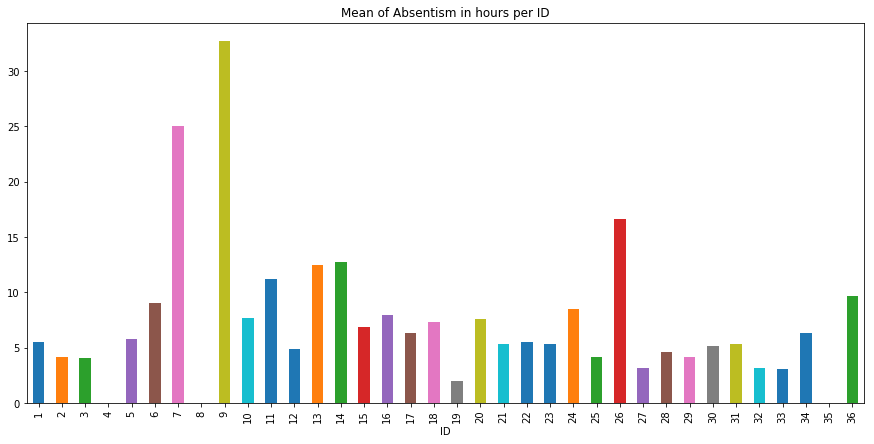

In [183]:
#Visualizations using barplots
import matplotlib.pyplot as pyplt
Data.groupby('ID')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Absentism in hours per ID',figsize=(15,7))
pyplt.show()

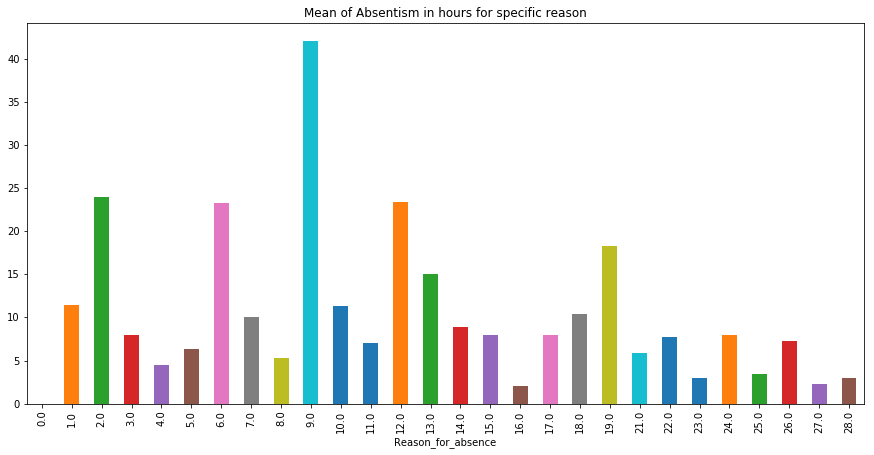

In [47]:
Data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Absentism in hours for specific reason',figsize=(15,7))
plt.show()

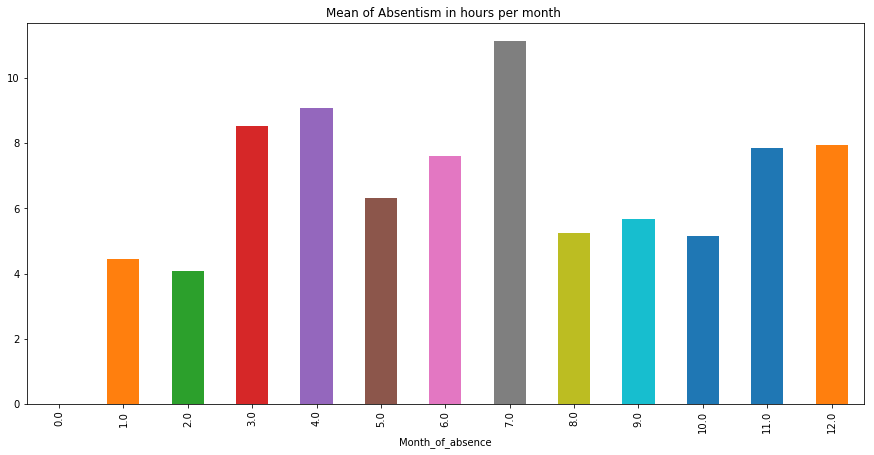

In [184]:
Data.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Absentism in hours per month ',figsize=(15,7))
plt.show()

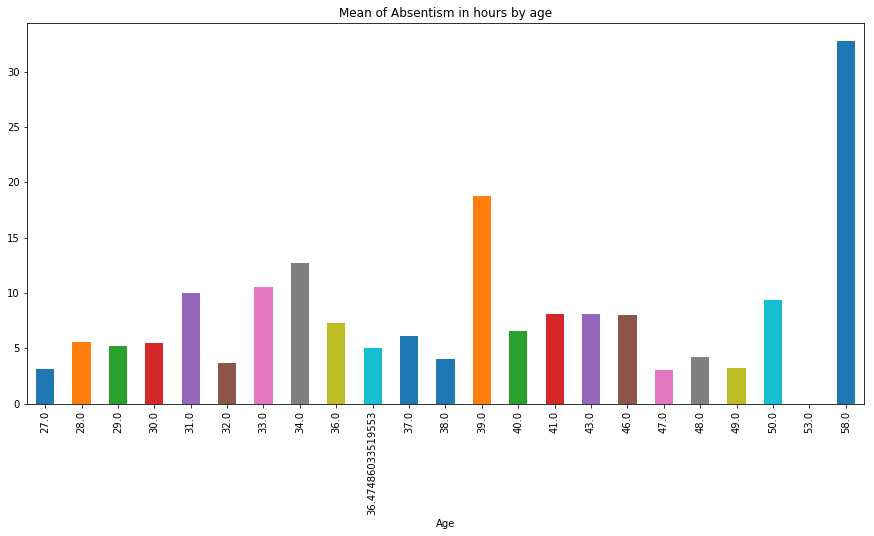

In [185]:
Data.groupby('Age')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Absentism in hours by age',figsize=(15,7))
plt.show()
#Data.to_csv("Data.csv", index = False)

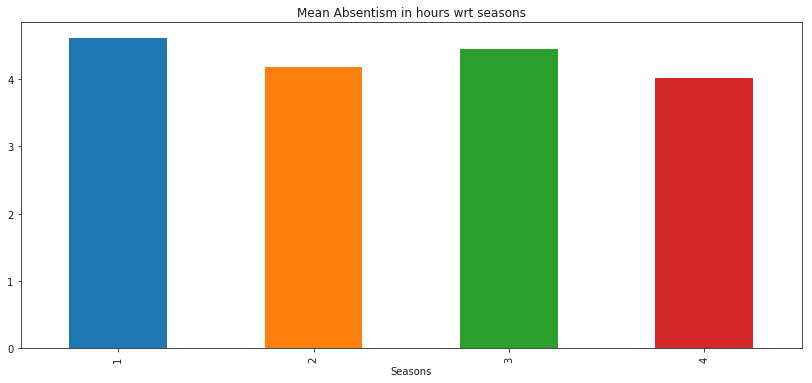

In [80]:
Data.groupby('Seasons')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours wrt seasons',figsize=(14,6))
pyplot.show()

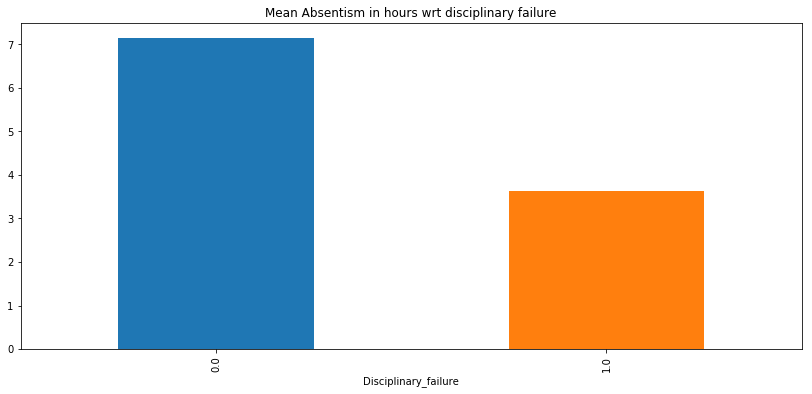

In [66]:
Data.groupby('Disciplinary_failure')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

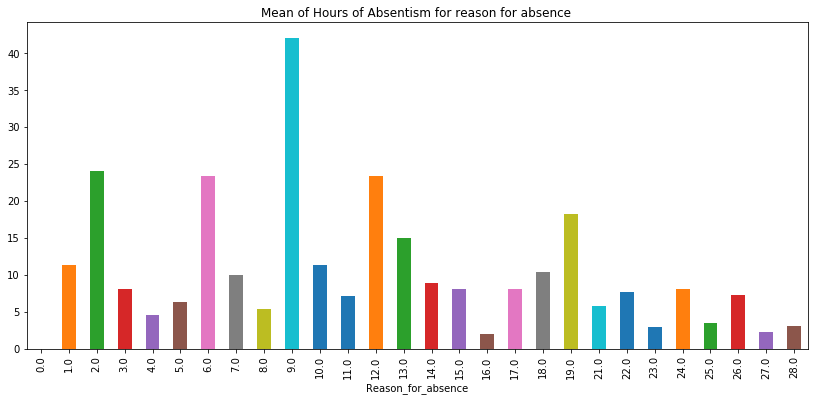

In [67]:
Data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

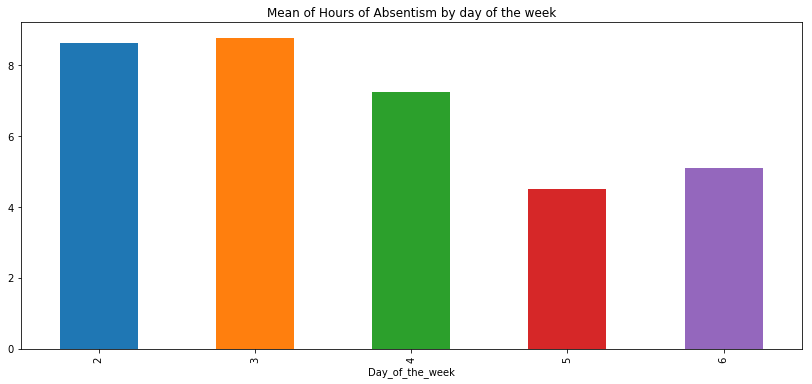

In [68]:
Data.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

In [71]:
#loss
Loss_data = pd.read_excel("Absenteeism_at_work_Project.xls")

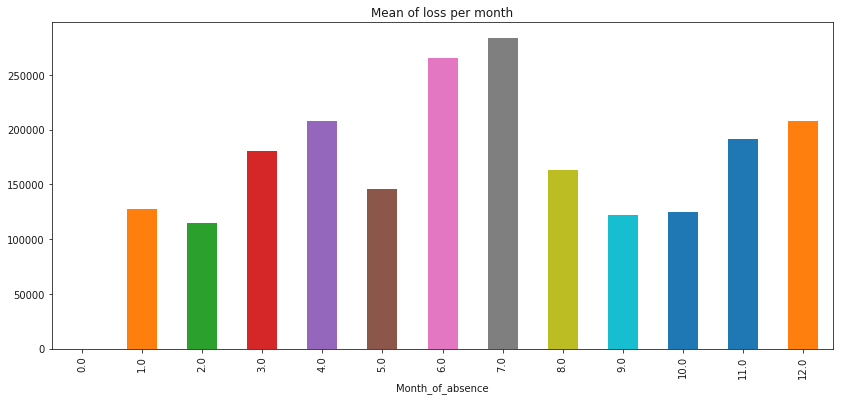

In [78]:
Loss_data.groupby('Month_of_absence')['loss'].mean().plot(kind='bar',title='Mean of loss per month',figsize=(14,6))
pyplot.show()

Transportation_expense                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Distance_from_Residence_to_Work    AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Service_time                       AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Work_load_Average_day                 AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Hit_target                         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Weight                             AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Height                                AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Body_mass_index                    AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Absenteeism_time_in_hours          AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
dtype: object

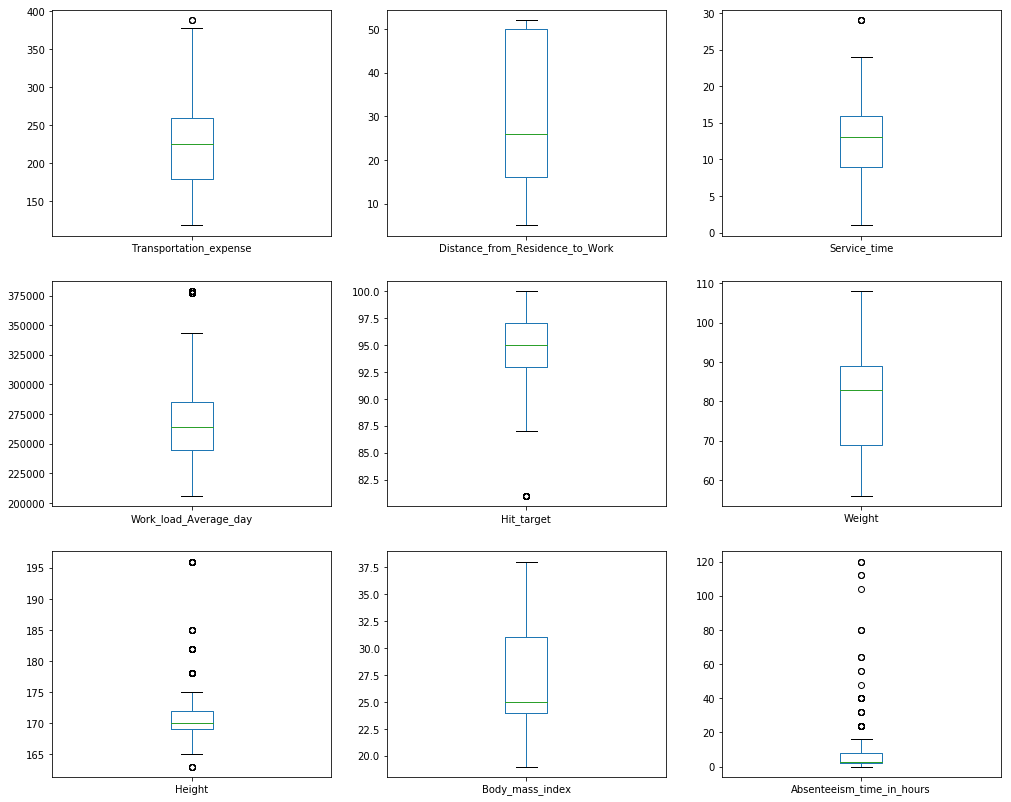

In [133]:
#Boxplots of numeric varaibles before outlier removal
Data_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [134]:
#Checking the variable importance with target variable using Extra Tree Regressor to get a feel of importance of variables
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=70)
X = Data.drop(columns=('Absenteeism_time_in_hours'))
y = Data['Absenteeism_time_in_hours']
reg.fit(X, y)
Var_importance = pd.DataFrame({'Feature': Data.drop(columns='Absenteeism_time_in_hours').columns,
                         'importance':reg.feature_importances_*100})
Var_importance.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

C:\Users\npava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Feature,importance
0,Reason_for_absence,19.516132
1,Day_of_the_week,13.728881
2,Month_of_absence,11.045311
3,Work_load_Average_day,9.399924
4,Seasons,6.337144
5,Hit_target,6.329666
6,Age,5.857114
7,Distance_from_Residence_to_Work,5.303442
8,ID,3.979104
9,Transportation_expense,3.112569


In [19]:
Data_outliers=Data.copy()

In [20]:
#Checking for outliers range and replacing it with NAs 
for i in cnames:
    print(i)
    q75, q25 = np.percentile(Data_outliers.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    Data_outliers.loc[Data_outliers.loc[:,i] < min, i] = np.nan
    Data_outliers.loc[Data_outliers.loc[:,i] > max, i] = np.nan 

Distance_from_Residence_to_Work
-35.0
101.0
Service_time
-1.5
26.5
Age
17.5
53.5
Work_load_Average_day
183688.0
345552.0
Transportation_expense
57.5
381.5
Hit_target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Absenteeism_time_in_hours
-7.0
17.0


In [21]:
missing_val2 = pd.DataFrame(Data_outliers.isnull().sum())
missing_val2

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,3
Distance_from_Residence_to_Work,0
Service_time,5
Age,8
Work_load_Average_day,29


In [22]:
cnames_outliers = ['Absenteeism_time_in_hours', 'Service_time','Age', 'Work_load_Average_day', 'Hit_target','Pet', 'Height','Transportation_expense']

In [23]:
#Creating outliers only for Absenteeism per hour, and leaving other variables untouched
for i in cnames_outliers:
    print(i)
    q75, q25 = np.percentile(Data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    Data.loc[Data.loc[:,i] < min, i] = np.nan
    Data.loc[Data.loc[:,i] > max, i] = np.nan 

Absenteeism_time_in_hours
-7.0
17.0
Service_time
-1.5
26.5
Age
17.5
53.5
Work_load_Average_day
183688.0
345552.0
Hit_target
87.0
103.0
Pet
-1.5
2.5
Height
164.5
176.5
Transportation_expense
57.5
381.5


In [24]:
missing_val3 = pd.DataFrame(Data.isnull().sum())
missing_val3

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,3
Distance_from_Residence_to_Work,0
Service_time,5
Age,8
Work_load_Average_day,29


In [25]:
for i in cnames_outliers:
    Data[i] = Data[i].fillna(Data[i].mean())

In [26]:
for i in catnames:
    Data.loc[:, i] = Data.loc[:, i].astype('category')


Data.iloc[:, 0] = Data.iloc[:, 0].astype(object)

In [27]:
Data_num=Data.select_dtypes(['float64'])
Data_cat=Data.select_dtypes(['category'])
Data_num = Data_num.reset_index(drop=True)
Data_num.index += 1
Data_cat = Data_cat.reset_index(drop=True)
Data_cat.index += 1

In [70]:
Data.to_csv("final.csv", index=False)

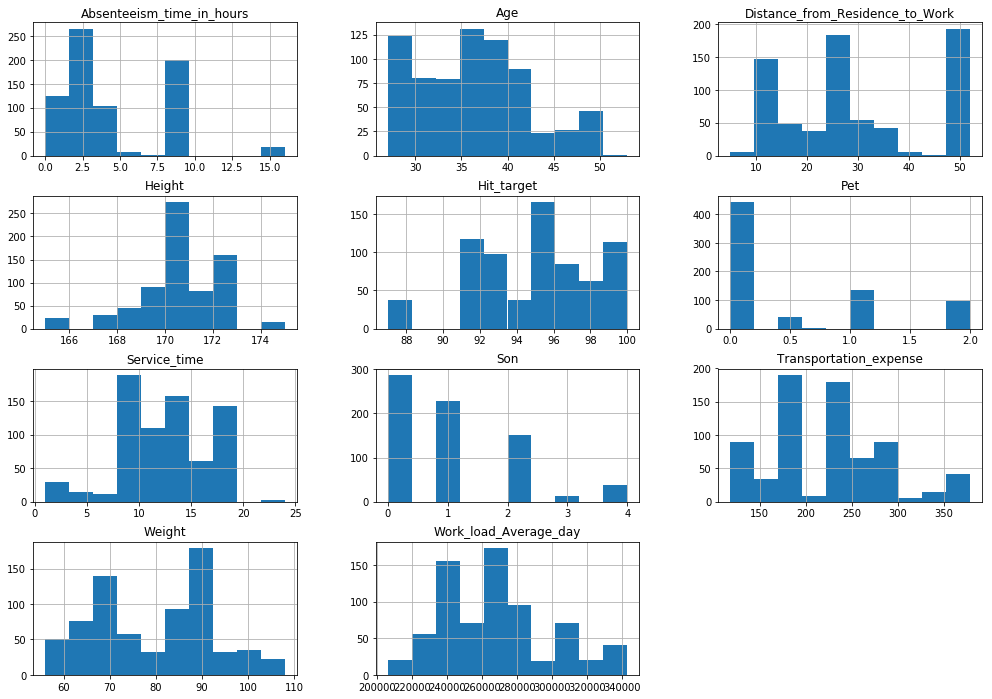

In [29]:
#Histograms after outlier removal
from matplotlib import pyplot
Data_num.hist(figsize=(17,12))
pyplot.show()

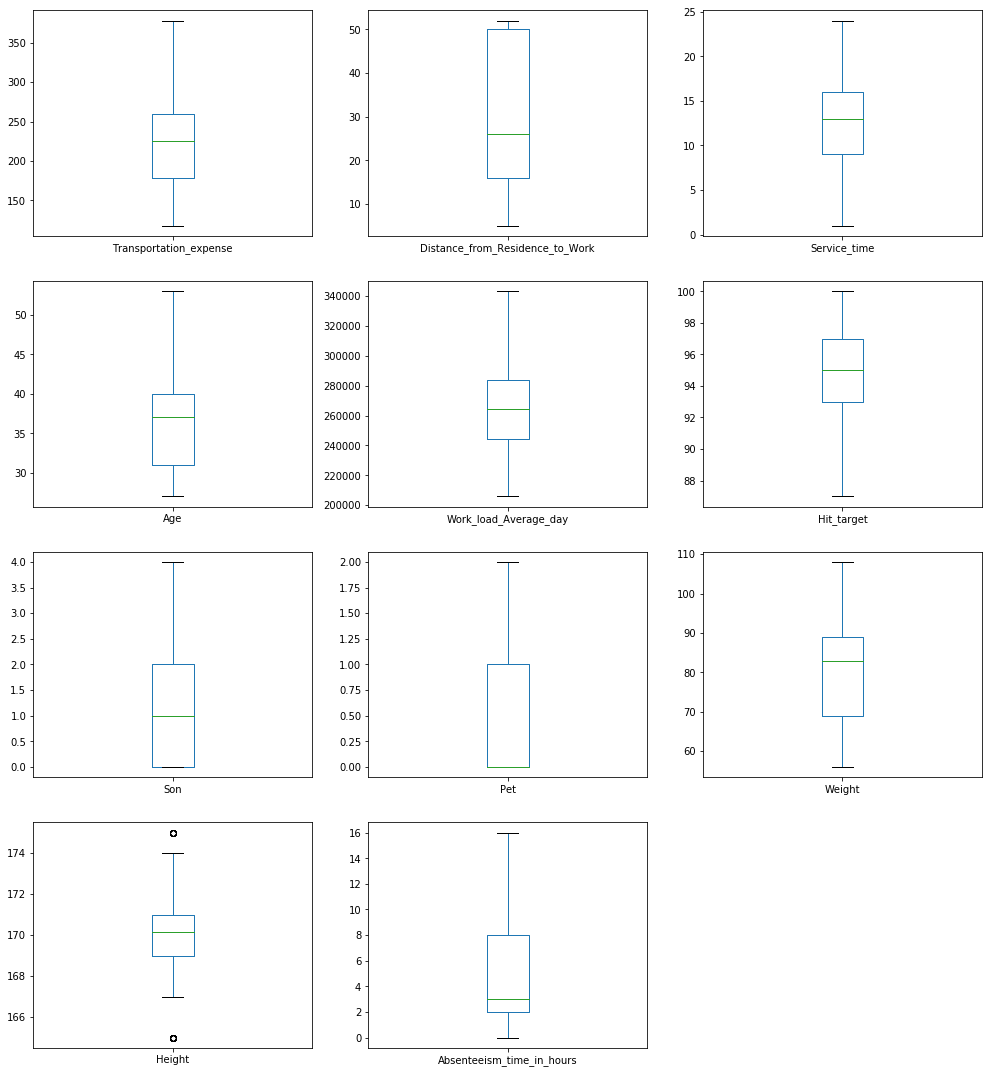

In [30]:
#Boxplots of numeric varaibles after outlier removal
Data_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)
pyplot.show()

In [31]:
cnames = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_day', 'Transportation_expense',
       'Hit_target', 'Son', 'Pet', 'Weight', 'Height']

# Feature Scaling

In [32]:
#Feature Scaling of all numeric varaibles except the target varaible
for i in cnames:
   
    Data[i] = (Data[i] - Data[i].min())/(Data[i].max() - Data[i].min())

In [33]:
from sklearn.cross_validation import train_test_split
from random import *    
from numpy import *

C:\Users\npava\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Users\npava\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
Data_1=Data.copy()

In [36]:
#Creating dummies for all categorical variables

mylist = list(Data.select_dtypes(include=['category']).columns)
dummies = pd.get_dummies(Data_1[mylist], prefix= mylist,drop_first=True)
Data_1.drop(mylist, axis=1, inplace = True)
Data_1 = pd.concat([Data_1,dummies], axis =1)

In [37]:
#Creating train and test data
random.seed(2)
X = Data_1.drop(columns=['Absenteeism_time_in_hours','ID'])
y = Data_1['Absenteeism_time_in_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [38]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

# Model Deployment

# Performing all the regressions in one go with their default parameters

In [45]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lars
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

Regressors = [DecisionTreeRegressor(),  RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(),
 LinearRegression(), ElasticNet(), SVR(), KNeighborsRegressor(),XGBRegressor()]


cols=["Regressors", "MSE"]
app = pd.DataFrame(columns=cols)
for rgr in Regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Test Data Results')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Train Data Results')
    act_predictions = rgr.predict(X_train)
    mse_train = np.sqrt(mean_squared_error(y_train, act_predictions))
    print("RMSE: {}".format(mse_train))
    
    print("="*50)
    reg_res = pd.DataFrame([[name, mse]], columns=cols)
    app = app.append(reg_res)
    


DecisionTreeRegressor
Test Data Results
RMSE: 3.824541543184805
Train Data Results
RMSE: 0.25778147678248137
RandomForestRegressor
Test Data Results
RMSE: 3.468767192562448
Train Data Results
RMSE: 1.0918574855806094
AdaBoostRegressor
Test Data Results
RMSE: 3.4465859253981264
Train Data Results
RMSE: 2.5515389548918086
GradientBoostingRegressor
Test Data Results
RMSE: 3.42379727095487
Train Data Results
RMSE: 1.8460071874090063
ExtraTreesRegressor
Test Data Results
RMSE: 3.624585648204571
Train Data Results
RMSE: 0.25778147678248137
LinearRegression
Test Data Results
RMSE: 3.4275532126609485
Train Data Results
RMSE: 2.2569432271523633
ElasticNet
Test Data Results
RMSE: 4.017314770687356
Train Data Results
RMSE: 3.135733832376387
SVR
Test Data Results
RMSE: 3.9241772751234167
Train Data Results
RMSE: 2.812744599370027
KNeighborsRegressor
Test Data Results
RMSE: 3.565191880010028
Train Data Results
RMSE: 2.299086013817613


C:\Users\npava\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:40:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
Test Data Results
RMSE: 3.41583277390409
Train Data Results
RMSE: 1.933906385656717


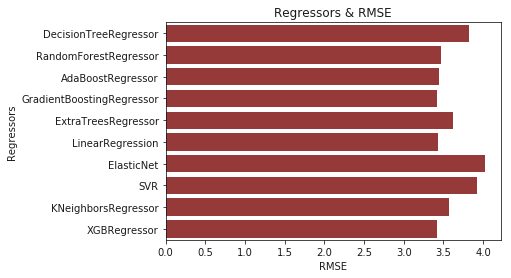

In [62]:
#A plot indicating all regressions' RMSE values for easy comparison
sn.set_color_codes("deep")
sn.barplot(x='MSE', y='Regressors', data=app, color="brown")

pyplot.xlabel('RMSE')
pyplot.title('Regressors & RMSE')
pyplot.show()

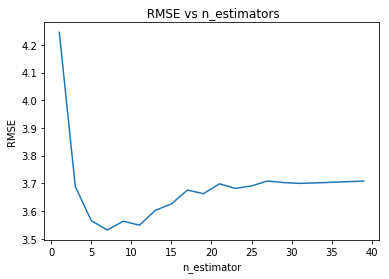

In [47]:
#Checking the number of nearest neighbours v/s RMSE for KNN

KNN_model=KNeighborsRegressor().fit(X_train, y_train)
estimators = np.arange(1, 41, 2)
scores = []

for n in estimators:
    KNN_model.set_params(n_neighbors=n)
    KNN=KNN_model.fit(X_train,y_train)
    train_predictions_y = KNN.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

pyplot.title(" RMSE vs n_estimators")
pyplot.xlabel("n_estimator")
pyplot.ylabel("RMSE")
pyplot.plot(estimators, scores)